In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
# switch to amazon dataset as primary
filename = 'amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv'

# read data into dataframe
df = pd.read_csv('amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv', sep='\t', error_bad_lines=False)

b'Skipping line 1686: expected 15 fields, saw 22\nSkipping line 23469: expected 15 fields, saw 22\nSkipping line 25225: expected 15 fields, saw 22\nSkipping line 48778: expected 15 fields, saw 22\nSkipping line 54061: expected 15 fields, saw 22\n'
b'Skipping line 66479: expected 15 fields, saw 22\nSkipping line 85019: expected 15 fields, saw 22\nSkipping line 102383: expected 15 fields, saw 22\nSkipping line 108349: expected 15 fields, saw 22\nSkipping line 111834: expected 15 fields, saw 22\nSkipping line 122189: expected 15 fields, saw 22\nSkipping line 124293: expected 15 fields, saw 22\n'
b'Skipping line 137493: expected 15 fields, saw 22\nSkipping line 138671: expected 15 fields, saw 22\nSkipping line 147213: expected 15 fields, saw 22\nSkipping line 156030: expected 15 fields, saw 22\nSkipping line 159108: expected 15 fields, saw 22\nSkipping line 162860: expected 15 fields, saw 22\nSkipping line 166640: expected 15 fields, saw 22\nSkipping line 174287: expected 15 fields, saw 22

In [5]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,10293599,R14LVB34Z2Z53I,B000YMOQZY,262935067,Knockin' On Heaven's Door,Digital_Music_Purchase,5.0,0.0,0.0,N,Y,favorites,Great rendition. Great song,2015-08-31
1,US,6087195,R2M0R9CWPC82LT,B00ISAEC80,452318038,Flawless,Digital_Music_Purchase,5.0,0.0,0.0,N,Y,Five Stars,A good music to listen.,2015-08-31
2,US,33717063,RQNQI2R3BM52A,B00VBB6AVU,675969129,Scandal of Grace,Digital_Music_Purchase,4.0,0.0,0.0,N,Y,Good,Not as good as the original but I needed to he...,2015-08-31
3,US,14948020,RTUIX1135HUAB,B008A5POJO,282925893,I Surrender (Live),Digital_Music_Purchase,5.0,0.0,0.0,N,Y,Wonderful lyrics! Makes you feel like praying,Time to worship and surrender with this song. ...,2015-08-31
4,US,21694522,RE3QSAT8TL010,B014CW2RN4,109077793,We Are Young (Jersey Club),Digital_Music_Purchase,4.0,0.0,0.0,N,Y,Hot remix but took short,So this should be longer....but love this song:),2015-08-31


In [8]:
len(df.customer_id.unique())

796587

In [9]:
df_2 = pd.read_csv('trimmed_rating_2.csv')

In [15]:
df_2.head(20)

,Unnamed: 0,customer_id,product_title,star_rating,product_nid
0,0,10293599,Knockin' On Heaven's Door,5.0,1
1,2,33717063,Scandal of Grace,4.0,3
2,3,14948020,I Surrender (Live),5.0,4
3,9,51714365,Bat Out Of Hell,5.0,10
4,22,44196047,Feels So Right,5.0,23
5,27,49726199,Traveller,5.0,28
6,29,32745105,Tell Mama,5.0,30
7,33,51159996,Uptown Funk,4.0,34
8,37,22146246,Classic Man [Clean],4.0,38
9,41,14744748,Save Rock And Roll [Explicit],5.0,42


In [12]:
len(df_2.product_title.unique())

17619

In [4]:
df_rating = df[['customer_id', 'product_title', 'star_rating']]

In [12]:
df_rating[df_rating.customer_id.isna()]

,customer_id,product_title,star_rating


In [13]:
df_rating[df_rating.product_title.isna()]

,customer_id,product_title,star_rating


In [17]:
df_rating.drop(df_rating[df_rating.star_rating.isna()].index, inplace=True)

/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
df_rating[df_rating.star_rating.isna()]

,customer_id,product_title,star_rating


In [20]:
len(df_rating.product_title.unique())

499913

In [21]:
len(df_rating.customer_id.unique())

796587

In [22]:
df_rating

,customer_id,product_title,star_rating
0,10293599,Knockin' On Heaven's Door,5.0
1,6087195,Flawless,5.0
2,33717063,Scandal of Grace,4.0
3,14948020,I Surrender (Live),5.0
4,21694522,We Are Young (Jersey Club),4.0
...,...,...,...
1681479,49890809,The Human Condition In Twelve Fractions,5.0
1681480,49890809,Liberate te ex Inferis,5.0
1681481,46804575,Blood On The Dance Floor/ History In The Mix,4.0
1681482,49890809,Satisfaction Is The Death Of Desire,5.0


In [23]:
song_count=0

for song in df_rating.product_title.unique():
    song_count+=1

In [24]:
song_count

499913

In [34]:
all_songs = df_rating.product_title.unique().tolist()

In [35]:
all_songs

["Knockin' On Heaven's Door",
 'Flawless',
 'Scandal of Grace',
 'I Surrender (Live)',
 'We Are Young (Jersey Club)',
 'Lord, I Live',
 "I'll Never Be Free",
 'All of the Stars',
 'Exile On Main Street (Deluxe Edition)',
 'Bat Out Of Hell',
 'Stronger Than Her Love',
 'You Hold It All (Live)',
 'Pressure - Single',
 'What Are The Chances?',
 'Beauty Behind The Madness [Explicit]',
 "It's The Huck-A-Bucks",
 'Two Purple Shadows',
 'Consolation',
 'One Man Army [Explicit]',
 'Without You (feat. Alexa Diane, David Lee Richeson & Dustin Swan) [Explicit]',
 'Lose My Mind',
 'Battle Begins',
 'Feels So Right',
 'Amnesia [Act 5]',
 'Live Wire',
 "You Don't Know (feat. Wale) [Explicit]",
 'Turandot: Act III - Calaf\'s Aria - "Nessun dorma"',
 'Traveller',
 'Live From The Woods',
 'Tell Mama',
 'Cowgirl’s Rodeo',
 'Whole Lotta Rosie',
 'Crimson Cord',
 'Uptown Funk',
 'Eulogy For An Angel',
 'Permission To Land',
 'The Definitive Collection',
 'Classic Man [Clean]',
 'Bang Bang',
 'Prayer Of Th

In [36]:
all_songs[0]

"Knockin' On Heaven's Door"

In [37]:
# generate reindexing indices
reindexing = dict()
for n in range(1, 499914):
    reindexing[all_songs[n-1]] = n

In [38]:
reindexing

{"Knockin' On Heaven's Door": 1,
 'Flawless': 2,
 'Scandal of Grace': 3,
 'I Surrender (Live)': 4,
 'We Are Young (Jersey Club)': 5,
 'Lord, I Live': 6,
 "I'll Never Be Free": 7,
 'All of the Stars': 8,
 'Exile On Main Street (Deluxe Edition)': 9,
 'Bat Out Of Hell': 10,
 'Stronger Than Her Love': 11,
 'You Hold It All (Live)': 12,
 'Pressure - Single': 13,
 'What Are The Chances?': 14,
 'Beauty Behind The Madness [Explicit]': 15,
 "It's The Huck-A-Bucks": 16,
 'Two Purple Shadows': 17,
 'Consolation': 18,
 'One Man Army [Explicit]': 19,
 'Without You (feat. Alexa Diane, David Lee Richeson & Dustin Swan) [Explicit]': 20,
 'Lose My Mind': 21,
 'Battle Begins': 22,
 'Feels So Right': 23,
 'Amnesia [Act 5]': 24,
 'Live Wire': 25,
 "You Don't Know (feat. Wale) [Explicit]": 26,
 'Turandot: Act III - Calaf\'s Aria - "Nessun dorma"': 27,
 'Traveller': 28,
 'Live From The Woods': 29,
 'Tell Mama': 30,
 'Cowgirl’s Rodeo': 31,
 'Whole Lotta Rosie': 32,
 'Crimson Cord': 33,
 'Uptown Funk': 34,
 '

In [42]:
# ***IMPORTATN*** use this line to generate index for songs to be fitted into our surprise model
df_rating['product_nid'] = df_rating.product_title.apply(lambda x: reindexing[x])

/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_rating

,customer_id,product_title,star_rating,product_nid
0,10293599,Knockin' On Heaven's Door,5.0,1
1,6087195,Flawless,5.0,2
2,33717063,Scandal of Grace,4.0,3
3,14948020,I Surrender (Live),5.0,4
4,21694522,We Are Young (Jersey Club),4.0,5
...,...,...,...,...
1681479,49890809,The Human Condition In Twelve Fractions,5.0,499912
1681480,49890809,Liberate te ex Inferis,5.0,54663
1681481,46804575,Blood On The Dance Floor/ History In The Mix,4.0,45804
1681482,49890809,Satisfaction Is The Death Of Desire,5.0,499913


In [524]:
song_counts = df_rating_1.product_nid.value_counts()

In [127]:
df_rating.product_nid.filter([477973,242944])

477973     5426
242944    10356
Name: product_nid, dtype: int64

In [133]:
df_rating.product_nid.filter(song_list)

979          933
2012        1831
1917        1749
143          143
506          495
           ...  
144459      7123
91222      52730
191581      1195
47861      31224
323379    127957
Name: product_nid, Length: 175929, dtype: int64

In [103]:
songs_more_than_one_rating = song_counts[song_counts>1]

In [104]:
song_list = list(songs_more_than_one_rating.index)

In [136]:
# df_rating_1 dropped all songs that only has 1 rating
df_rating_1 = df_rating[df_rating.product_nid.isin(song_list)]

In [145]:
# drop greatest hits
df_rating_1.drop(df_rating_1[df_rating_1.product_title == 'Greatest Hits'].index, axis=0, inplace=True)

/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [518]:
df_rating_1.drop(df_rating_1[df_rating_1.product_title == 'The Definitive Collection'].index, axis=0, inplace=True)

/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [146]:
df_rating_1.product_title.value_counts().head(50)

Happy (From "Despicable Me 2")                                                      2643
All About That Bass                                                                 1523
Home                                                                                1517
Hallelujah                                                                          1498
Uptown Funk                                                                         1410
That's Christmas To Me                                                              1178
Blurred Lines [feat. T.I. & Pharrell]                                               1168
Born This Way                                                                       1030
Shake It Off                                                                        1000
The Definitive Collection                                                            969
Mary, Did You Know?                                                                  938
Let It Go (From "Froz

In [177]:
df_rating_1

,customer_id,product_title,star_rating,product_nid
0,10293599,Knockin' On Heaven's Door,5.0,1
2,33717063,Scandal of Grace,4.0,3
3,14948020,I Surrender (Live),5.0,4
4,21694522,We Are Young (Jersey Club),4.0,5
6,20031966,I'll Never Be Free,5.0,7
...,...,...,...,...
1681477,49890809,The Rain In Endless Fall,5.0,411177
1681478,42965654,Chameleon,3.0,34502
1681480,49890809,Liberate te ex Inferis,5.0,54663
1681481,46804575,Blood On The Dance Floor/ History In The Mix,4.0,45804


In [248]:
sum(df_rating_1.customer_id.value_counts() == 1)

55284

In [243]:
len(df_rating_1.customer_id.unique())

166454

In [245]:
166454*17620

2932919480

In [244]:
len(df_rating_1.product_title.unique())

17620

In [247]:
df_rating_1.product_title.value_counts()

Happy (From "Despicable Me 2")                      1666
Home                                                1004
Hallelujah                                           951
All About That Bass                                  928
Uptown Funk                                          820
                                                    ... 
Pitter-Pat (Acoustic) (Amazon Exclusive Version)      10
Wang Dang Doodle                                      10
Feels Like Carolina                                   10
That's Christmas to Me                                10
Superstar (Featuring Matthew Santos)                  10
Name: product_title, Length: 17620, dtype: int64

In [519]:
# second save, got rid of any song that has less than 10 rating, and user with less than 
df_rating_1.to_csv('trimmed_rating_2.csv')

In [205]:
unique_songs2 = df_rating_1.product_title.unique()

In [195]:
sum(df_rating_1.product_title.value_counts() == 1)

39936

In [196]:
158483-39936

118547

In [211]:
song_counts2 = df_rating_1.product_title.value_counts()

In [233]:
songs_more_than_one_rating2 = list(song_counts2[song_counts2 > 9].index)

In [241]:
df_rating_1 = df_rating_1[df_rating_1.product_title.isin(songs_more_than_one_rating2)]

In [184]:
df_rating_1.to_csv('trimmed_rating_1.csv')

In [185]:
user_rating_counts = df_rating_1.customer_id.value_counts()

In [169]:
# get all users with only one rating
urc_one = user_rating_counts[user_rating_counts == 1].index

In [170]:
urc_one

Int64Index([17364043, 30730931,  9840548, 10657039,  5728184, 12565441,
             2762768,  5403439, 51761812, 26277416,
            ...
            30631938, 20142084, 47826943, 41107463, 13840393, 41099275,
            45287438, 47417374, 28850099, 44044290],
           dtype='int64', length=475282)

In [176]:
df_rating_1.drop(df_rating_1[df_rating_1.customer_id.isin(urc_one)].index, axis=0, inplace=True)

/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [172]:
df_rating_1.customer_id.isin(urc_one)

0          False
1           True
2          False
3          False
4          False
           ...  
1681477    False
1681478    False
1681480    False
1681481    False
1681483    False
Name: customer_id, Length: 1354262, dtype: bool

In [520]:
df_rating_1

,customer_id,product_title,star_rating,product_nid
0,10293599,Knockin' On Heaven's Door,5.0,1
2,33717063,Scandal of Grace,4.0,3
3,14948020,I Surrender (Live),5.0,4
9,51714365,Bat Out Of Hell,5.0,10
22,44196047,Feels So Right,5.0,23
...,...,...,...,...
1681432,51111807,Take It Off,5.0,27892
1681445,12072984,Speak,4.0,38895
1681453,15172571,Cascade,4.0,15499
1681472,40057531,Reign In Blood,5.0,32942


## end of trimming dataset

In [531]:
# generate list of most popular 100 songs for new user to rate
new_user_rate = list(df_rating_1.product_title.value_counts().index[:100])

In [497]:
# generate two dictionnaries of titles and their corresponding nids
# this is used to get one by the other
song_title_nid = dict()
song_nid_title = dict()
for i, nid in enumerate(nids):
    song_title_nid[nid] = titles[i]
    song_nid_title[titles[i]] = nid
    
song_nid_title

{"Knockin' On Heaven's Door": 1,
 'Scandal of Grace': 3,
 'I Surrender (Live)': 4,
 'Bat Out Of Hell': 10,
 'Feels So Right': 23,
 'Traveller': 28,
 'Tell Mama': 30,
 'Uptown Funk': 34,
 'The Definitive Collection': 37,
 'Classic Man [Clean]': 38,
 'Save Rock And Roll [Explicit]': 42,
 'No Sleeep (feat. J. Cole)': 47,
 'Reflection': 48,
 '20 All-Time Greatest Hits!': 50,
 'Dancing in the Sky (Instrumental) [No Vocals]': 51,
 'Dirt Road': 60,
 'Stay With Me': 61,
 'Sunny': 66,
 'See You Again': 69,
 'Shangri-La': 72,
 'Journey To The Center of the Mind': 73,
 'Hair Of The Dog': 87,
 'Mr. Bojangles': 89,
 'I Am A Man Of Constant Sorrow (From “O Brother, Where Art Thou” Soundtrack / Radio Station Version) [feat. Dan Tyminski]': 91,
 'Send in the Clowns': 92,
 'The Hills [Explicit]': 94,
 'Wrote a Song for Everyone': 110,
 'The Paradigm Shift [Explicit]': 113,
 'Stardust': 123,
 "Like I'm Gonna Lose You": 125,
 'I Bless Your Name': 138,
 'Wrecking Ball': 142,
 'Gotta Get Away': 144,
 'Waka

In [397]:
titles = list(df_rating_1.product_title.unique())

In [399]:
nids = list(df_rating_1.product_nid.unique())

In [562]:
def get_song_name(iid, dataset=df_rating_1): 
    # get song name from iid
    titles = list(df_rating_1.product_title.unique())
    nids = list(df_rating_1.product_nid.unique())
    if iid in titles:
        return nids[titles.index(iid)]
    else:
        return titles[nids.index(iid)]

In [574]:
get_song_name('Christmas')

3366

In [521]:
# rating_data (saved as ratin_data.csv) for model use, df_rating_1 (saved as trimmed_rating_2.csv)
rating_data = df_rating_1[['customer_id', 'product_nid', 'star_rating']]
rating_data.to_csv('rating_data.csv')

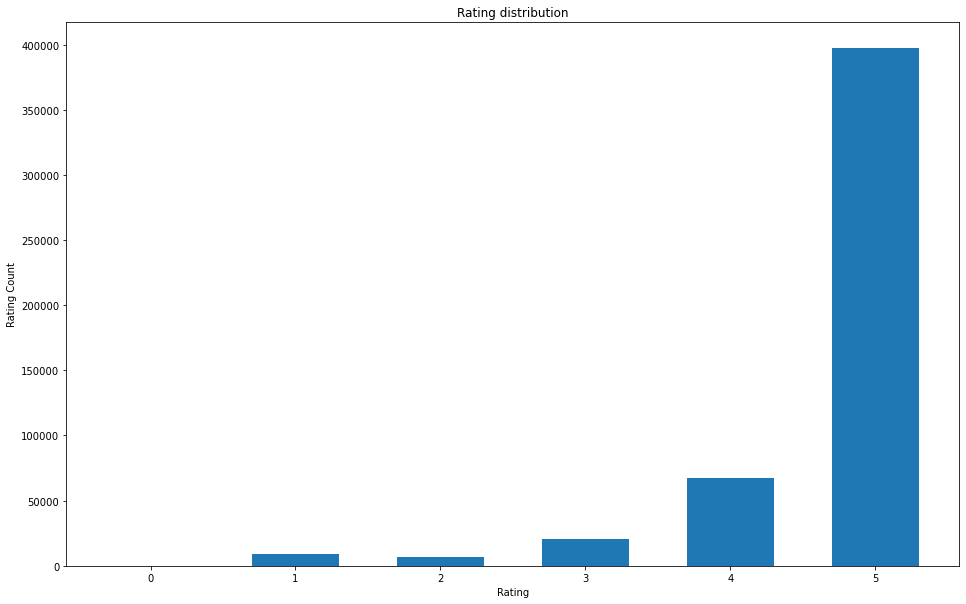

In [673]:
plt.figure(figsize=(16,10))

plt.hist(df_rating_1.star_rating, bins=np.arange(7)-0.5, rwidth=0.6)
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.savefig('User_rating_dist.png')
plt.show()

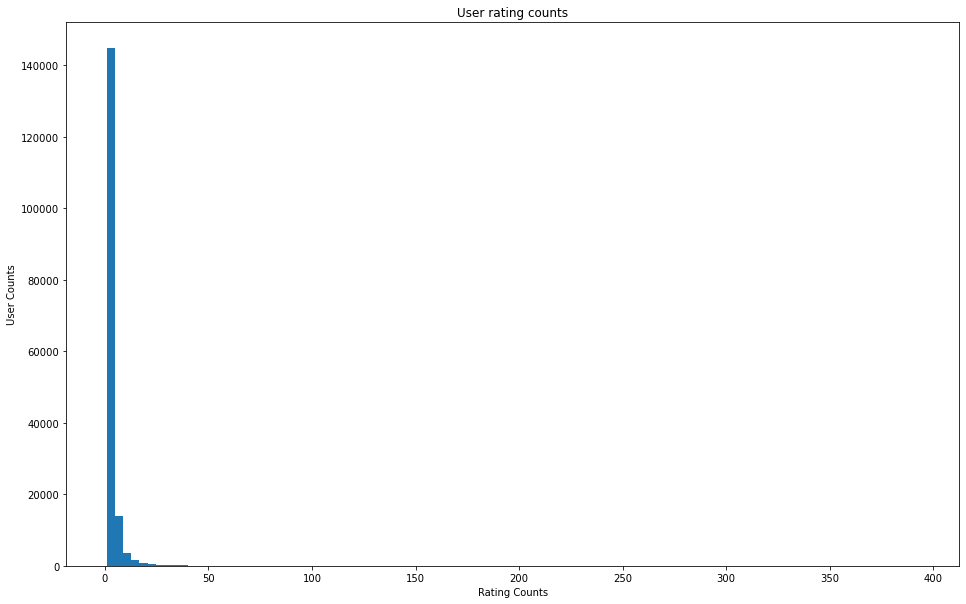

In [675]:
plt.figure(figsize=(16,10))

plt.hist(df_rating_1.customer_id.value_counts().drop(42418272), bins = 100)
plt.title('User rating counts')
plt.xlabel('Rating Counts')
plt.ylabel('User Counts')
plt.savefig('user_rating_counts.png')
plt.show()

In [665]:
df_rating_1.customer_id.value_counts().drop(42418272)

29274627    393
7080939     390
34376725    250
35193692    248
13679703    240
           ... 
49423671      1
47435623      1
8629973       1
15016267      1
51382273      1
Name: customer_id, Length: 166362, dtype: int64

In [302]:
df_rating_1.customer_id.value_counts()

42418272    1173
29274627     393
7080939      390
34376725     250
35193692     248
            ... 
34427031       1
32310311       1
44945543       1
49076329       1
51382273       1
Name: customer_id, Length: 166454, dtype: int64

In [526]:
song_counts3 = df_rating_1.product_title.value_counts()

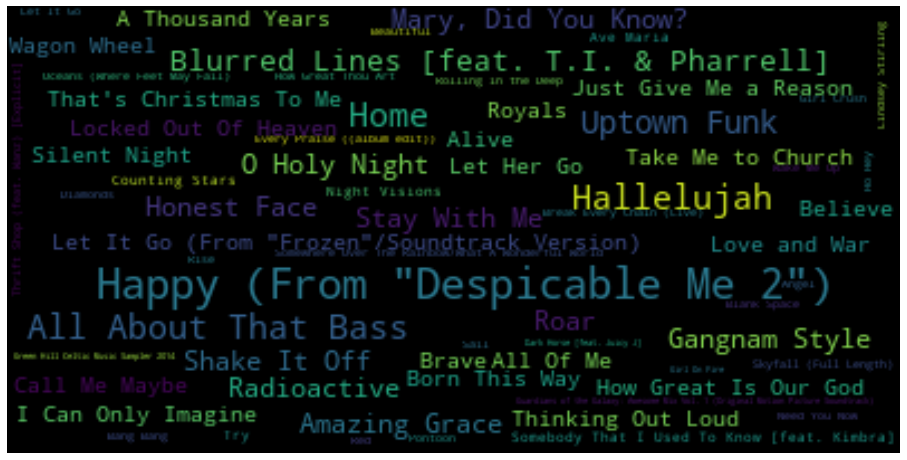

In [528]:
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=song_counts3)

plt.figure(figsize=(16,16))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('popular_songs_wc.png', dpi=500)
plt.show()

In [322]:
import surprise
from surprise import Reader, Dataset, accuracy
from surprise.model_selection import train_test_split, KFold
from surprise import dump

In [529]:
df_rating_1.star_rating.describe()

count    500461.000000
mean          4.671311
std           0.776688
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: star_rating, dtype: float64

In [530]:
# use this to generate recommendations for existing users
rating_data

,customer_id,product_nid,star_rating
0,10293599,1,5.0
2,33717063,3,4.0
3,14948020,4,5.0
9,51714365,10,5.0
22,44196047,23,5.0
...,...,...,...
1681432,51111807,27892,5.0
1681445,12072984,38895,4.0
1681453,15172571,15499,4.0
1681472,40057531,32942,5.0


In [542]:
4875689 in rating_data.customer_id.values

False

In [355]:
all_songs = rating_data.product_nid.unique()

In [353]:
rating_data[rating_data.customer_id == 10293599]

,customer_id,product_nid,star_rating
0,10293599,1,5.0
1156,10293599,1092,5.0
1438,10293599,1335,5.0


In [310]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data, reader)

In [548]:
data

In [321]:
train, test = train_test_split(data, test_size=0.2)

In [553]:
model1 = surprise.SVDpp().fit(data.build_full_trainset())
pred1 = model1.test(test)
accuracy.rmse(pred1)

RMSE: 0.5267


0.5266908334317818

In [318]:
accuracy.rmse(pred1)

RMSE: 0.6860


0.6859898730894424

In [555]:
# testing
from v1.Model import recommender

In [556]:
recommender = recommender()

In [544]:
accuracy.rmse(baseline_alg.test(test))

RMSE: 0.5632


0.5631822018960613

In [323]:
dump.dump('svdpp1', algo=model1)

In [324]:
_ , persistedmodel = dump.load('svdpp1')

In [431]:
persistedmodel.predict(33717063, 1)

Prediction(uid=33717063, iid=1, r_ui=None, est=4.581773123179477, details={'was_impossible': False})

In [363]:
u33717063_songs = rating_data[rating_data.customer_id == 33717063].product_nid.values

In [371]:
all_songs_ = list(all_songs)
all_songs_.remove(u33717063_songs[0])

In [416]:
u33717063_songs

array([  3, 798, 824])

In [550]:
[[33717063, iid, 4] for iid in all_songs_]

[[33717063, 1, 4],
 [33717063, 4, 4],
 [33717063, 10, 4],
 [33717063, 23, 4],
 [33717063, 28, 4],
 [33717063, 30, 4],
 [33717063, 34, 4],
 [33717063, 37, 4],
 [33717063, 38, 4],
 [33717063, 42, 4],
 [33717063, 47, 4],
 [33717063, 48, 4],
 [33717063, 50, 4],
 [33717063, 51, 4],
 [33717063, 60, 4],
 [33717063, 61, 4],
 [33717063, 66, 4],
 [33717063, 69, 4],
 [33717063, 72, 4],
 [33717063, 73, 4],
 [33717063, 87, 4],
 [33717063, 89, 4],
 [33717063, 91, 4],
 [33717063, 92, 4],
 [33717063, 94, 4],
 [33717063, 110, 4],
 [33717063, 113, 4],
 [33717063, 123, 4],
 [33717063, 125, 4],
 [33717063, 138, 4],
 [33717063, 142, 4],
 [33717063, 144, 4],
 [33717063, 146, 4],
 [33717063, 150, 4],
 [33717063, 151, 4],
 [33717063, 156, 4],
 [33717063, 160, 4],
 [33717063, 164, 4],
 [33717063, 168, 4],
 [33717063, 170, 4],
 [33717063, 171, 4],
 [33717063, 172, 4],
 [33717063, 173, 4],
 [33717063, 181, 4],
 [33717063, 182, 4],
 [33717063, 190, 4],
 [33717063, 8, 4],
 [33717063, 195, 4],
 [33717063, 201, 4],


In [376]:
# generate predictions for user 33717063
pred_33717063 = persistedmodel.test([[33717063, iid, 4] for iid in all_songs_])

In [409]:
# get predicted rating and song id
pred_33717063_ = [(pred.est, pred.iid) for pred in pred_33717063]

In [655]:
# generate recommendations
for n in range(5):
    recs = random.choice(sorted(pred_33717063_, key=lambda x: x[0], reverse=True)[10:100])
    print(song_title_nid[recs[1]], '\n')

Blackbird Song 

The Best In Me (Album Version) 

Write Your Story 

Dance with Me Tonight 

Paint It, Black 



In [656]:
pred_33717063_

[(4.581773123179477, 1),
 (4.851585329351694, 4),
 (4.656920911849244, 10),
 (4.793186638001852, 23),
 (4.721604393833378, 28),
 (4.642769929528939, 30),
 (4.810095604875118, 34),
 (4.597924674051428, 37),
 (4.593793935296695, 38),
 (4.49176303172381, 42),
 (4.783261557621663, 47),
 (4.568649640822681, 48),
 (4.574650842259254, 50),
 (4.469346431842222, 51),
 (4.907932576245235, 60),
 (4.793499235366459, 61),
 (4.66709893688866, 66),
 (4.662249405780806, 69),
 (4.7632445992587105, 72),
 (4.680849415073896, 73),
 (4.6972383137764675, 87),
 (4.583603950216629, 89),
 (4.6005242036225615, 91),
 (4.525072850783355, 92),
 (4.571373114026052, 94),
 (4.532257216918957, 110),
 (4.476542587273884, 113),
 (4.567042077165207, 123),
 (4.589404479226224, 125),
 (4.720328638485971, 138),
 (4.437047448028978, 142),
 (4.369648501395412, 144),
 (4.538122874983209, 146),
 (4.346928043575534, 150),
 (4.48801635248727, 151),
 (4.584851533885868, 156),
 (4.5341064474980755, 160),
 (4.781165013693424, 164),


In [532]:
print('Please choose the songs you would like to rate:')
for song in new_user_rate:
    print(song)

Please choose the songs you would like to rate:
Happy (From "Despicable Me 2")
Home
Hallelujah
All About That Bass
Uptown Funk
Blurred Lines [feat. T.I. & Pharrell]
Shake It Off
Roar
Amazing Grace
Radioactive
O Holy Night
Honest Face
Gangnam Style
Stay With Me
Mary, Did You Know?
Let It Go (From "Frozen"/Soundtrack Version)
Royals
All Of Me
A Thousand Years
That's Christmas To Me
Thinking Out Loud
How Great Is Our God
Silent Night
Call Me Maybe
Take Me to Church
Just Give Me a Reason
Brave
I Can Only Imagine
Locked Out Of Heaven
Believe
Love and War
Born This Way
Alive
Wagon Wheel
Let Her Go
Somebody That I Used To Know [feat. Kimbra]
Counting Stars
Night Visions
Try
Ave Maria
Somewhere Over The Rainbow/What A Wonderful World
Pontoon
Skyfall (Full Length)
Need You Now
How Great Thou Art
Ho Hey
Break Every Chain (Live)
Beautiful
Sail
Red
Thrift Shop (feat. Wanz) [Explicit]
Lindsey Stirling
Rise
Rolling in the Deep
Angel
Girl Crush
Blank Space
Diamonds
Wake Me Up
Bang Bang
Every Praise (

In [602]:
def new_user_rating_input():
    new_user_ratings = []
    for n in range(5):
        song = input('Song: ')
        rating = input('Rate (1 to 5): ')
        new_rating = [4875689, get_key(song), int(rating)]
        new_user_ratings.append(new_rating)
    return new_user_ratings

In [603]:
new_user = new_user_rating_input()

Song:  Happy (From "Despicable Me 2")
Rate (1 to 5):  2
Song:  All About That Bass
Rate (1 to 5):  2
Song:  Stay
Rate (1 to 5):  5
Song:  We Are Young (feat. Janelle Monáe)
Rate (1 to 5):  4
Song:  Demons
Rate (1 to 5):  4


In [597]:
new_user = new_user_rating_input()

Song:  Happy (From "Despicable Me 2")
Rate (1 to 5):  2
Song:  All About That Bass
Rate (1 to 5):  2
Song:  Stay
Rate (1 to 5):  5
Song:  We Are Young (feat. Janelle Monáe)
Rate (1 to 5):  4
Song:  Demons
Rate (1 to 5):  4


In [604]:
new_user

[[4875689, 2012, 2],
 [4875689, 1917, 2],
 [4875689, 1724, 5],
 [4875689, 2739, 4],
 [4875689, 2051, 4]]

In [605]:
new_user_df = pd.DataFrame(new_user, columns=['customer_id', 'product_nid', 'star_rating'])

In [606]:
new_user_df

,customer_id,product_nid,star_rating
0,4875689,2012,2
1,4875689,1917,2
2,4875689,1724,5
3,4875689,2739,4
4,4875689,2051,4


In [517]:
def new_user_to_df(new_user):
    new_user_df = pd.DataFrame(new_user, columns=['customer_id', 'product_nid', 'star_rating'])

In [575]:
rating_test = rating_data.copy()

In [607]:
rating_test2 = pd.concat([rating_test, new_user_df])

In [647]:
rating_test[rating_test['product_nid'] == 1724]

,customer_id,product_nid,star_rating
1885,31932039,1724,5.0
3463,11126421,1724,4.0
10662,9743936,1724,5.0
28034,49166948,1724,5.0
29381,1793811,1724,5.0
...,...,...,...
1602584,19994164,1724,5.0
1610305,20625276,1724,5.0
1618393,39877228,1724,5.0
1664194,11853703,1724,4.0


In [654]:
df_rating_1[df_rating_1['product_title'] == 'Stay'].product_nid.unique()

array([1724])

In [638]:
from v1.Model import recommender

In [639]:
recommender=recommender()

In [640]:
recommender.read_data(data=rating_test2)

In [641]:
recommender.fit()

Model failed to fit


In [644]:
rating_test2_ = Dataset.load_from_df(rating_test2, reader)

In [645]:
surprise.SVDpp().fit(rating_test2_)

AttributeError: 'DatasetAutoFolds' object has no attribute 'global_mean'

In [449]:
username = input("Enter username:")
print("Username is: " + username)

'123'

In [486]:
song_title_nid[1]

"Knockin' On Heaven's Door"

In [498]:
def get_key(val, some_dict=song_nid_title): 
    if val in some_dict.keys():
        return some_dict[val]
    else:
        return 'Song not found'

In [494]:
"Knockin' On Heaven's Door" in song_title_nid.values()

True

In [372]:
len(all_songs_)

17619

In [373]:
len(all_songs)

17620

# abandoned API method (for MusicBrainz db)

In [3]:
test_r = requests.get('https://musicbrainz.org/ws/2/area/45f07934-675a-46d6-a577-6f8637a411b1?inc=aliases')

In [4]:
test_r

<Response [200]>

In [7]:
import musicbrainzngs

In [10]:
musicbrainzngs.set_useragent(app='Python', version='3.7.7')

In [9]:
!python --version

Python 3.7.7


In [11]:
artist_id = "c5c2ea1c-4bde-4f4d-bd0b-47b200bf99d6"
try:
    result = musicbrainzngs.get_artist_by_id(artist_id)
except WebServiceError as exc:
    print("Something went wrong with the request: %s" % exc)
else:
    artist = result["artist"]
    print("name:\t\t%s" % artist["name"])
    print("sort name:\t%s" % artist["sort-name"])

name:		The xx
sort name:	xx, The


In [13]:
look_for_freddie = musicbrainzngs.search_artists(artist='Freddie Mercury')

In [17]:
look_for_freddie['artist-list']

[{'id': '022589ac-7177-460d-a178-9976cf70e29f',
  'type': 'Person',
  'ext:score': '100',
  'name': 'Freddie Mercury',
  'sort-name': 'Mercury, Freddie',
  'gender': 'male',
  'country': 'GB',
  'area': {'id': '8a754a16-0027-3a29-b6d7-2b40ea0481ed',
   'type': 'Country',
   'name': 'United Kingdom',
   'sort-name': 'United Kingdom',
   'life-span': {'ended': 'false'}},
  'begin-area': {'id': '71b1aedf-a1ad-4eb6-83a0-57134c8b34e2',
   'type': 'District',
   'name': 'Stone Town',
   'sort-name': 'Stone Town',
   'life-span': {'ended': 'false'}},
  'end-area': {'id': 'a37eca4d-c1e2-48a3-bcba-61796db97ebf',
   'type': 'District',
   'name': 'Kensington',
   'sort-name': 'Kensington',
   'life-span': {'ended': 'false'}},
  'ipi-list': ['00077406269'],
  'isni-list': ['0000000109859100'],
  'life-span': {'begin': '1946-09-05', 'end': '1991-11-24', 'ended': 'true'},
  'alias-list': [{'locale': 'en',
    'sort-name': 'Mercury, Frederick',
    'type': 'Legal name',
    'alias': 'Frederick Mercu

In [19]:
freddie_id = '022589ac-7177-460d-a178-9976cf70e29f'

freddie_result = musicbrainzngs.get_artist_by_id(freddie_id)

In [25]:
freddie_result['artist']

{'id': '022589ac-7177-460d-a178-9976cf70e29f',
 'type': 'Person',
 'name': 'Freddie Mercury',
 'sort-name': 'Mercury, Freddie',
 'ipi': '00077406269',
 'ipi-list': ['00077406269'],
 'isni-list': ['0000000109859100'],
 'gender': 'Male',
 'country': 'GB',
 'area': {'id': '8a754a16-0027-3a29-b6d7-2b40ea0481ed',
  'name': 'United Kingdom',
  'sort-name': 'United Kingdom',
  'iso-3166-1-code-list': ['GB']},
 'begin-area': {'id': '71b1aedf-a1ad-4eb6-83a0-57134c8b34e2',
  'name': 'Stone Town',
  'sort-name': 'Stone Town'},
 'end-area': {'id': 'a37eca4d-c1e2-48a3-bcba-61796db97ebf',
  'name': 'Kensington',
  'sort-name': 'Kensington'},
 'life-span': {'begin': '1946-09-05', 'end': '1991-11-24', 'ended': 'true'}}

In [26]:
wwry = requests.get('https://musicbrainz.org/ws/2/recording?query=%22we%20will%20rock%20you%22%20AND%20arid:0383dadf-2a4e-4d10-a46a-e9e041da8eb3')

In [49]:
wwry.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><metadata created="2020-09-14T20:29:29.397Z" xmlns="http://musicbrainz.org/ns/mmd-2.0#" xmlns:ns2="http://musicbrainz.org/ns/ext#-2.0"><recording-list count="284" offset="0"><recording id="6b2b4307-aa2a-41ae-b1f1-cba5bc171ee6" ns2:score="100"><title>We Will Rock You</title><disambiguation>live, 1986-07-12: Wembley Stadium, London, England</disambiguation><video>true</video><artist-credit><name-credit><name>Queen</name><artist id="0383dadf-2a4e-4d10-a46a-e9e041da8eb3"><name>Queen</name><sort-name>Queen</sort-name><disambiguation>UK rock group</disambiguation></artist></name-credit></artist-credit><release-list><release id="9938dc67-9a77-440b-b0f1-5a31b3bf1a34"><title>Live at Wembley Stadium (25th anniversary edition)</title><status>Official</status><disambiguation>2011 remaster</disambiguation><release-group id="372f535d-a06d-35f4-a171-5f63e27c3f8d" type="Live" type-id="6fd474e2-6b58-3102-9d17-d6f7eb7da0a0"><title>Live at Wembley ’